# Google playstore Data
### Complete EDA analysis from A to Z

# About Dataset
- Context\
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- Content\
Each app (row) has values for catergory, rating, size, and more.

- Acknowledgements\
This information is scraped from the Google Play Store. This app information would not be available without it.

- Inspiration\
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

### Objective:
Dive into the world of apps on the Google Play Store! I will uncover interesting facts and patterns about the apps available on the Google Play Store using data analysis techniques. I'll be working with a dataset that includes details like App name, category, rating, reviews, size, installs, type, price, content rating, and genres.

# Questions to address:
- Which App Categories Are Most Popular? Look at which types of apps (like games or education) are more common.
- How Do Ratings Vary? Explore how app ratings spread out. Are most apps well-liked, or is there a wide variety?
- Do More Reviews Mean Better Ratings? See if apps with lots of reviews tend to have higher ratings.
- Are Bigger Apps in Certain Categories? Check if apps in some categories are generally bigger in size than others.
- Free vs. Paid Apps: Compare how many apps are free versus paid, and see if there's a trend in different app categories.
- How Much Do Paid Apps Cost? If an app isn't free, how much does it usually cost? Does this change depending on the type of app?
- Who Are Apps Made For? Look at the content ratings (like Everyone or Teen) to see what age groups apps are targeting.
- What Genres Are Most Popular? Identify which genres within categories are most popular and how they relate to app ratings and installs.

# 1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# 2. Data Loading and Exploration

- Lets load the data

In [5]:
df = pd.read_csv('./Data/googleplaystore.csv')

- Modifying display size of dataset 

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

- Top 5 rows of data

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
print(f"The number of rows in the dataset are {df.shape[0]}, and the number of columns in the dataset is {df.shape[1]}\nThe names of columns in this dataset are as follows:\n{df.columns}")

The number of rows in the dataset are 10841, and the number of columns in the dataset is 13
The names of columns in this dataset are as follows:
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


- As we can see many numeric type columns are considered as object type, So we have change those to numeric

# 3. Data Wrangling/Data Cleaning

### 3.1 Size column

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
#### Unique Observations:
1. data with "Varies with device"
2. data with "M"
3. data with "k"

- Lets check how many times the unique values repeated


In [11]:
# Find the values having "M" in the them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum() # we can also check it for unique values

8830

In [12]:
# Find the values having "k" in the them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [13]:
# Find the values having "Varies with device" in the them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [14]:
# lets check we have other observations or not
print(f"The sum of values having 'k', 'M', 'varies with device' =", 8830+316+1695)
print(f"The sum of all values =",len(df))
# if both are same it means we have no other observation in Size column

The sum of values having 'k', 'M', 'varies with device' = 10841
The sum of all values = 10841


- Now, dealing with the anomaly in size column

In [15]:
# convert the whole size into Bytes instead of Mega and kilo Bytes

# let's create a function to convert the size:
def size_to_bytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return float(size)

In [16]:
# Applying the above function
df['Size'] = df['Size'].apply(size_to_bytes)

In [17]:
df.rename(columns={'Size': "Size_in_bytes"}, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
# making a column for size in MB
df['Size_in_MB'] = df['Size_in_bytes'] / 1024 / 1024
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1K-10K,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,100K-1M,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1M-10M,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10M-1B,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10K-100K,2.8


### 3.2 installs column

In [18]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [20]:
df['Installs'].isnull().sum()

0

### Observation
1. Remove '+' Sign
2. Remove ','
3. convert the column into integer

In [21]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',"")if '+' in str(x) else x)

In [22]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',"")if ',' in str(x) else x)
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

In [23]:
# typecasting
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [24]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [25]:
print(f"As we can see, the minimum installs is {df['Installs'].min()} and the maximum installs is {df['Installs'].max()}")
print(f"So we will make binning of the installs")

As we can see, the minimum installs is 0 and the maximum installs is 1000000000
So we will make binning of the installs


In [26]:
# making new column called 'Installs category' 
bins = [-1, 0, 10, 1000 , 10000, 100000, 1000000, 10000000, 1000000000]
labels = ['0','0-10', '10-1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M-1B']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins , labels=labels)

In [27]:
df['Installs_category'].value_counts()

Installs_category
10-1K       2162
100K-1M     2118
1M-10M      2004
10K-100K    1648
1K-10K      1531
10M-1B       828
0-10         535
0             15
Name: count, dtype: int64

### 3.3 Price column

In [28]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

- $ sign must be removed

In [29]:
# checking how many values have $ in them
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [30]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$',"")if '$' in str(x) else x)

In [31]:
# typecasting
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Price'].describe()

count    10841.000000
mean         1.027273
std         15.948971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [32]:
df['Price'].describe()

count    10841.000000
mean         1.027273
std         15.948971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

### 3.4 Dealing with missing values

In [33]:
# we will check missing values for whole data set
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [34]:
# we will check missing values for whole data set in terms of percentage
(df.isnull().sum() / len(df)*100).sort_values(ascending=False)

Size_in_bytes        15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

- As we have some features which have missing values less than 1% , so can directly remove the missing instances.

In [35]:
df.shape

(10841, 14)

In [36]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category' , 'Type' and 'Genres' columns
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

- Out of 10841 rows we have removed 12 rows

In [37]:
df.isnull().sum()

App                     0
Category                0
Rating               1469
Reviews                 0
Size_in_bytes        1694
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

- Lets check how we can deal with missing values in `Rating`

In [38]:
df['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

- Lets check correlation of `Rating` with other features in order to impute it

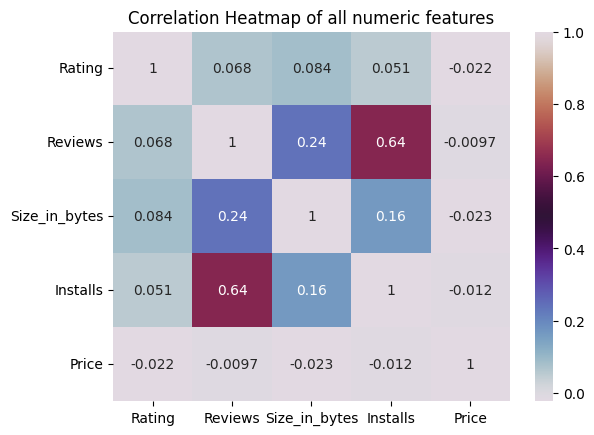

In [39]:
# Lets draw a heatmap to find out corellation between the features
sns.heatmap(df[['Rating', 'Reviews','Size_in_bytes','Installs','Price']].corr(), annot=True, cmap='twilight')
plt.title('Correlation Heatmap of all numeric features')
plt.show()

In [40]:
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0-10,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
10-1K,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
1K-10K,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
10K-100K,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
100K-1M,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
1M-10M,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
10M-1B,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


- So we can impute null values in `Rating` with mean of each `Install_category`

In [41]:
df.loc[(df['Installs_category'] == '0') & df['Rating'].isnull(), 'Rating'] = 0
df.loc[(df['Installs_category'] == '0-10') & df['Rating'].isnull(), 'Rating'] = 4.63
df.loc[(df['Installs_category'] == '10-1K') & df['Rating'].isnull(), 'Rating'] = 4.17
df.loc[(df['Installs_category'] == '1K-10K') & df['Rating'].isnull(), 'Rating'] = 4.04
df.loc[(df['Installs_category'] == '10K-100K') & df['Rating'].isnull(), 'Rating'] = 4.09
df.loc[(df['Installs_category'] == '100K-1M') & df['Rating'].isnull(), 'Rating'] = 4.2
df.loc[(df['Installs_category'] == '1M-10M') & df['Rating'].isnull(), 'Rating'] = 4.28
df.loc[(df['Installs_category'] == '10M-1B') & df['Rating'].isnull(), 'Rating'] = 4.37

In [42]:
df['Size_in_bytes'].describe()

count    9.135000e+03
mean     2.258066e+07
std      2.369152e+07
min      8.704000e+03
25%      5.138022e+06
50%      1.363149e+07
75%      3.145728e+07
max      1.048576e+08
Name: Size_in_bytes, dtype: float64

In [43]:
df['Size_in_bytes'].fillna(df['Size_in_bytes'].mean(), inplace=True)

- We have imputed missing values in `Size_in_bytes` with mean of `Size` column

### 3.5 Finding Duplicates in the dataset

- As we have some duplicated values in our dataset so we must remove those

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
print(f'The number of rows after removing duplicates are {df.shape[0]}')

The number of rows after removing duplicates are 10346


# Answer of Question 1

In [46]:
common_category = df['Category'].value_counts().head(10)
common_category

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

Text(0, 0.5, 'Count')

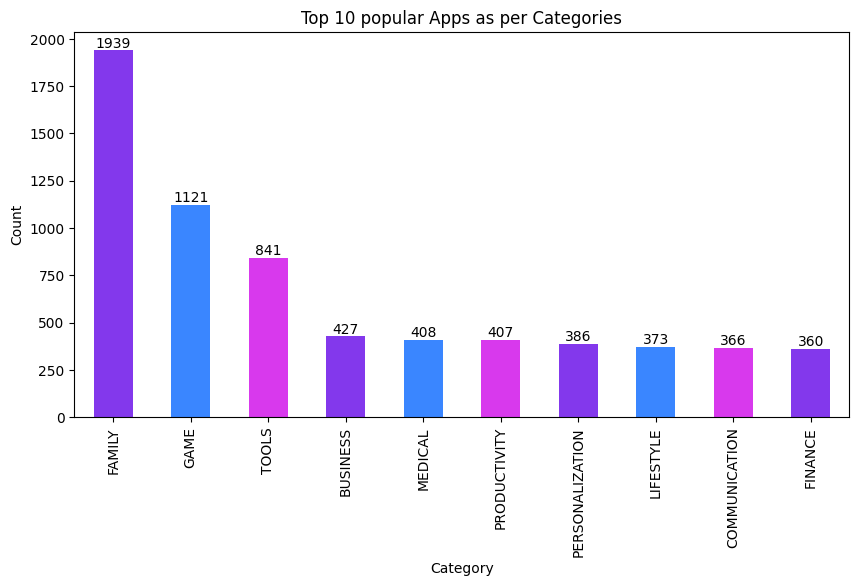

In [52]:
ax = common_category.plot(kind='bar', figsize=(10, 5), color=['#8338EC', '#3A86FF', '#D839ED'])  

# Adding data labels to each bar
for bar in ax.containers:
    ax.bar_label(bar)

# Adding chart title, labels, and styling
plt.title('Top 10 popular Apps as per Categories')
plt.xlabel('Category')
plt.ylabel('Count')

The graph provides compelling evidence that apps within the `Family` category possess the highest degree of popularity among users. The graph showcases the remarkable appeal and widespread adoption of `Family` category apps, positioning them as a preferred choice among users.

### Most installed Apps as per category

In [48]:
# Top 10 categories with the highest number of installs
cat = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Text(0, 0.5, 'Count')

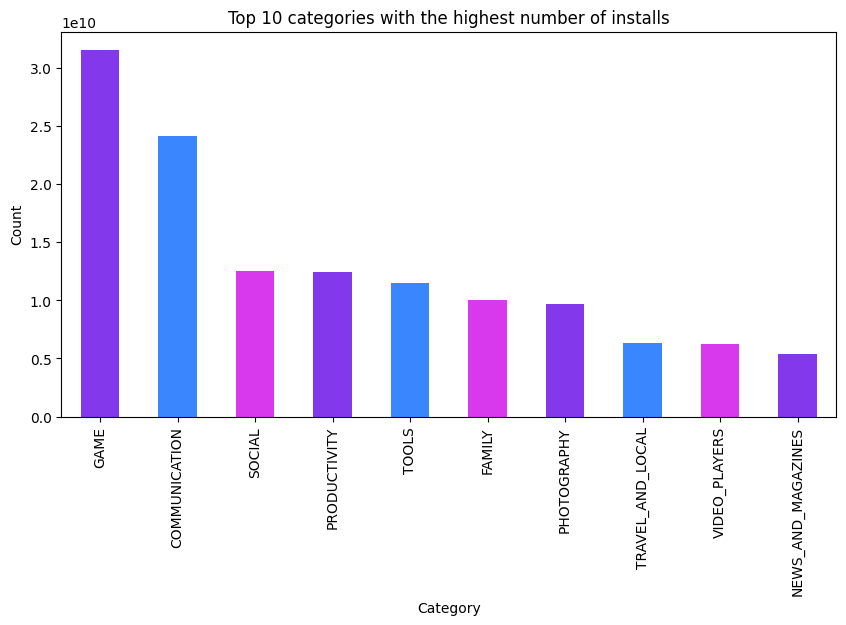

In [49]:
ax = cat.plot(kind='bar', figsize=(10, 5), color=['#8338EC', '#3A86FF', '#D839ED'])  

# Adding chart title, labels, and styling
plt.title('Top 10 categories with the highest number of installs')
plt.xlabel('Category')
plt.ylabel('Count')

The graph clearly illustrates that apps belonging to the `Game` category exhibit the highest number of installations. It indicates that the 'Game' category has garnered the highest level of user engagement and interest, leading to a substantial number of installations compared to other app categories depicted in the graph.

# Answer of question 2

<Axes: xlabel='Rating', ylabel='Density'>

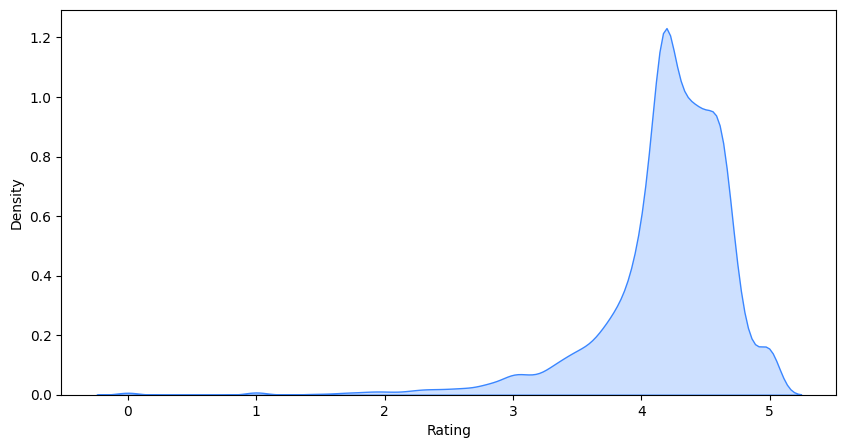

In [50]:
# Distribution of app ratings
plt.figure(figsize= (10,5))
sns.kdeplot(df['Rating'], shade=True, color='#3A86FF')

The graph effectively portrays the distribution of app `ratings`, capturing the frequency of each rating value within the dataset. The distribution pattern reveals a positive skew, indicating that a significant proportion of the ratings are concentrated towards the higher end of the scale. Specifically, the majority of app ratings fall within the range of 3 to 5, indicating a notably favorable average rating. This distribution pattern reflects a commendable level of user satisfaction and suggests that the majority of apps have received positive feedback from users.

# Answer of question 3:

In [51]:
px.scatter(df, x='Rating', y='Reviews', color='Type', title='Rating vs. Reviews')

The graph unmistakably demonstrates a strong positive correlation between the `ratings` and `reviews` of apps. Notably, apps with higher ratings consistently exhibit a marked increase in the number of reviews received. 
This empirical observation underscores the notion that apps with superior `ratings` tend to garner a greater level of user engagement and feedback.

# Answer of question 4

In [59]:
cate = df.groupby('Category')['Size_in_MB'].sum().sort_values(ascending=False).head(10)
cate

Category
FAMILY                53349.238799
GAME                  46732.502090
TOOLS                  8711.944238
SPORTS                 8341.976394
MEDICAL                7968.530983
FINANCE                6658.928373
HEALTH_AND_FITNESS     6615.559876
BUSINESS               6306.511568
PRODUCTIVITY           6174.344339
PHOTOGRAPHY            5791.396924
Name: Size_in_MB, dtype: float64

In [61]:
# checking size of Apps as per category
cate = df.groupby('Category')['Size_in_MB'].sum().sort_values(ascending=False).head(10)
px.scatter(cate, x=cate.index, y='Size_in_MB', title='Top 10 Categories with largest Size of Apps', size='Size_in_MB', color=cate.index)

The graphical representation illustrates a notable disparity in the sizes of app categories, specifically highlighting the substantial dominance of the `Family` and `Game` categories. These two categories exhibit a remarkable magnitude, surpassing the sizes of the remaining categories by more than twofold

# Answer of question 5

In [67]:
print(f'The number of free apps are {len(df[df["Type"] == "Free"])} which is {round(len(df[df["Type"] == "Free"])/len(df)*100, 2)}% of total data set.\nThe number of paid apps are {len(df[df["Type"] == "Paid"])} which contains {round(len(df[df["Type"] == "Paid"])/len(df)*100, 2)}% of total data set.')

The number of free apps are 9584 which is 92.63% of total data set.
The number of paid apps are 762 which contains 7.37% of total data set.


In [79]:
val = df['Type'].value_counts()
val

Type
Free    9584
Paid     762
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x27b91c4fa60>,
 [Text(-1.0706850494365547, 0.2522568629651981, 'Free'),
  Text(1.0706850376275574, -0.2522569130875824, 'Paid')],
 [Text(-0.5840100269653934, 0.13759465252647168, '92.6%'),
  Text(0.5840100205241221, -0.13759467986595403, '7.4%')])

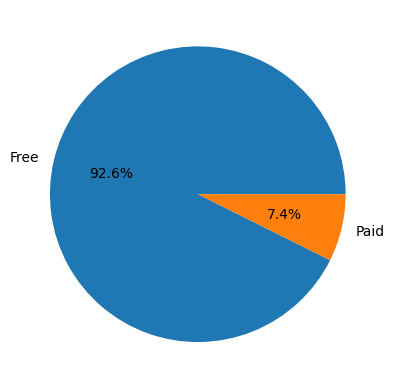

In [82]:
plt.pie(val, labels=val.index, autopct='%1.1f%%')

# Answer of question 6

In [94]:
Paid = df[df['Type'] == 'Paid']
Paid['Price'].describe()

count    762.000000
mean      14.005945
std       58.516437
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

In [93]:
print(f'The number of Paid Apps are {len(Paid)} which contains {round(len(Paid)/len(df)*100, 2)}% of total data set.\nRanging from {Paid["Price"].min()} to {Paid["Price"].max()} and having an average price of {round(Paid["Price"].mean(),2)}.\nIt means Paid Apps usually cost {round(Paid["Price"].mean(),2)}')

The number of Paid Apps are 762 which contains 7.37% of total data set.
Ranging from 0.99 to 400.0 and having an average price of 14.01.
It means Paid Apps usually cost 14.01


# Answer of question 7

In [98]:
x = df['Content Rating'].value_counts()

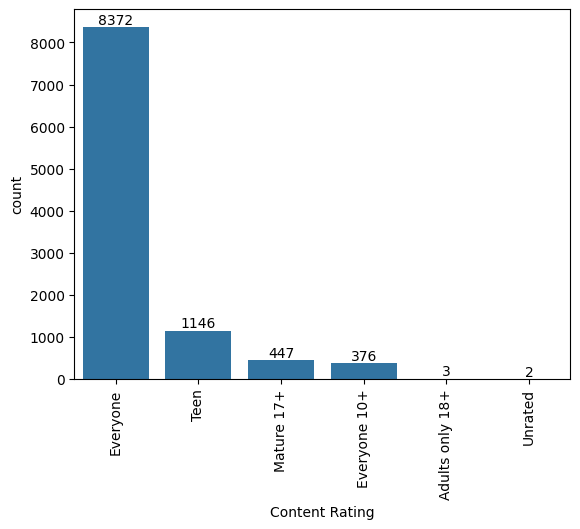

In [107]:
ax = sns.countplot(x=df['Content Rating'], order=df['Content Rating'].value_counts().index)
plt.xticks(rotation=90)
for bar in ax.containers:
    ax.bar_label(bar)

The graph unequivocally demonstrates that apps predominantly target the `"Everyone"` content rating, surpassing other content rating categories by a factor of four. This finding underscores the prevalent focus on providing content suitable for a wide audience, emphasizing the importance of catering to a broad user base. The substantial representation of the `"Everyone"` content rating category in the graph highlights its prominence and suggests a strategic approach adopted by app developers to ensure inclusivity and accessibility.

# Answer of question 8

In [118]:
gen = df['Genres'].value_counts().sort_values(ascending=False).head(10)
cat = df['Category'].value_counts().sort_values(ascending=False).head(10)

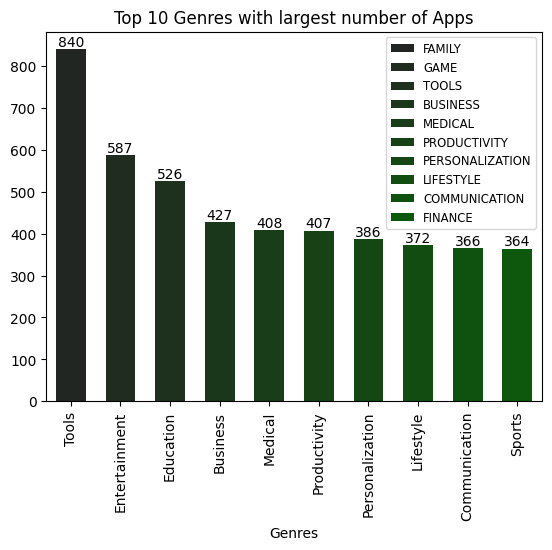

In [149]:
ax = sns.barplot(x=gen.index, y=gen.values, hue=cat.index, color='darkgreen', width=0.6)
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.title('Top 10 Genres with largest number of Apps')
ax.legend(loc='upper right',  fontsize='small')

The `Tools Genres` tops the popularity league having 840 applications with `Family` category

# App Analysis Report

This report provides a concise analysis of mobile application data, covering app categories, content ratings, and pricing. The aim is to uncover insights and trends that shed light on the app landscape.

- Category Analysis

The 'Game' category dominates app installations, showcasing its widespread popularity and user engagement. Additionally, the 'Family' category emerges as a prominent choice, indicating the appeal of family-oriented apps.

- Paid App Pricing

The average price of paid apps is approximately 14.01. Pricing variations exist based on functionality, target market, and competition, with category-specific trends influencing app pricing.

- Content Rating Analysis

The "Everyone" content rating category prevails, surpassing others by a factor of four. This emphasizes the focus on inclusive and accessible content for a broad audience.

# Conclusion

This analysis reveals key insights into the app landscape. The 'Game' category leads in installations, while the 'Family' category captures attention. Paid app pricing averages approximately 14.01. The dominance of the "Everyone" content rating reflects a deliberate strategy for inclusivity.

These findings inform developers, marketers, and decision-makers in navigating the dynamic and competitive app industry.